#Setting Things Up

In [ ]:
import math
import matplotlib.pyplot as plt
import torch
from torch import nn

In [ ]:
# Use gpu if available
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [ ]:
# Determining data array dimensions and domain

dataSize = 10000   #rows in data array
N = 2               #columns in data array, ie number of elements in each data set
domain = 8          #input constrained to -domain to +domain

In [ ]:
# Function that the neural network will learn

def funcOutput(data):
    return data**2

In [ ]:
# Function to generate data

def makeTrainingData(domain, N, dataSize):
    # Create a list of sets of N random numbers for training data
    inputs = torch.FloatTensor(dataSize, N).uniform_((-1*domain),domain).to(device)
    outputs = funcOutput(inputs).to(device)

    # Print a sample of input and output tensor training data
    print('A few inputs: \n {}'.format(inputs[:5]))
    print('A few outputs: \n {}'.format(outputs[:5]))
    
    return inputs, outputs

In [ ]:
# Function to create the neural network

# Define number of hidden nodes
hidden_nodes = 5000

def makeModel(hidden_nodes):
    model = torch.nn.Sequential(
       torch.nn.Linear(inputs.shape[1],hidden_nodes),
        torch.nn.ReLU(),
        #torch.nn.Linear(hidden_nodes,hidden_nodes),
        #torch.nn.ReLU(),
        torch.nn.Linear(hidden_nodes,outputs.shape[1])
        ).to(device)
    
    return model

In [ ]:
# Function to train the neural network
def trainModel(inputs, outputs):
    # Get ready to train
    model.train().to(device)

    # Break the list up into smaller batches for more efficient training
    numMiniBatch = int(math.floor(inputs.shape[0]/100.))
    inputMiniBatches = inputs.chunk(numMiniBatch)
    outputMiniBatches = outputs.chunk(numMiniBatch)

    # Train the neural network
    lossFunc = torch.nn.MSELoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)

    n_epochs = 500
    print("Training")
    print("_" * 50)
    for epoch in range(n_epochs):
    # Print something every 10 epochs of training
        if epoch%10 == 0:
            #print('=>Starting {}/{} epochs.'.format(epoch+1,n_epochs))
            print('.', end='')
        # Train the model
        for minibatch in range(numMiniBatch):
            prediction = model(inputMiniBatches[minibatch]).to(device)
            loss = lossFunc(prediction,outputMiniBatches[minibatch]).to(device)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    print("\nTraining done!")

In [ ]:
# Function to plot results

def plotResults():
  # Check out the output by running the model in evaluation
  with torch.no_grad():
    model.eval()
    test = 2*domain*torch.rand((dataSize, N), dtype = torch.float32) - (domain)
    desired_output = funcOutput(test)
    prediction = model(test)

  # Poltting predicted output versus desired output
  plt.scatter(test, desired_output, c = 'black', s = 4, alpha = 0.2)
  plt.scatter(test, prediction, c = 'red', s = 0.25, alpha = 0.2)

# Execution

The model can be trained multiple times for more accurate results.

In [ ]:
inputs, outputs = makeTrainingData(domain, N, dataSize)
model = makeModel(hidden_nodes)

A few inputs: 
 tensor([[ 5.1099,  2.8832],
        [ 0.1722, -7.9736],
        [-5.1266, -4.0004],
        [ 5.6851,  4.9117],
        [ 4.9648, -1.8269]])
A few outputs: 
 tensor([[2.6111e+01, 8.3127e+00],
        [2.9648e-02, 6.3579e+01],
        [2.6282e+01, 1.6003e+01],
        [3.2320e+01, 2.4124e+01],
        [2.4649e+01, 3.3377e+00]])


In [ ]:
trainModel(inputs, outputs)

Training
__________________________________________________
..................................................
 Training done!


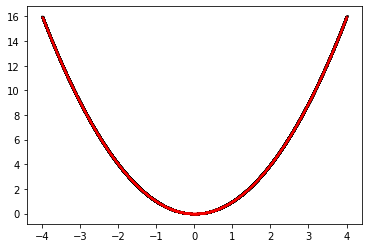

In [ ]:
plotResults()

NOTE: Not sure if training in cuda makes it faster with program coded as is.